In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Importing Dataset

In [2]:
df = pd.read_csv("Iris.csv")
df.head()

,sepal length,sepal width,petal length,petal width,iris
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.shape

(150, 5)

In [4]:
df.describe()

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Let's separate the features and targets from the dataset

In [5]:
X = df.drop(columns="iris")
y = df.iris

In [6]:
X.head()

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### Feature Normalization

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
scaler = StandardScaler()

x = scaler.fit_transform(X)

x = pd.DataFrame(x)

x.columns = X.columns

x.head()

,sepal length,sepal width,petal length,petal width
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


### Apply PCA on the data

In [9]:
# import the library

from sklearn.decomposition import PCA

In [10]:
# object instantiation

pca = PCA(random_state=10)

In [11]:
pca.fit(x)

PCA(random_state=10)

In [12]:
pca.components_

array([[ 0.52237162, -0.26335492,  0.58125401,  0.56561105],
       [ 0.37231836,  0.92555649,  0.02109478,  0.06541577],
       [-0.72101681,  0.24203288,  0.14089226,  0.6338014 ],
       [-0.26199559,  0.12413481,  0.80115427, -0.52354627]])

These are the principal components of the data (new basis vectors)

In [13]:
pca.explained_variance_ratio_

array([0.72770452, 0.23030523, 0.03683832, 0.00515193])

In [14]:
pca.explained_variance_ratio_.sum()

1.0000000000000002

Let's plot to compare the variances

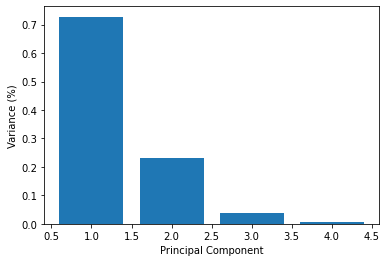

In [15]:
var_ratio = pca.explained_variance_ratio_

plt.bar(range(1, len(var_ratio) + 1), var_ratio)
plt.xlabel("Principal Component")
plt.ylabel("Variance (%)")
plt.show()

### Let's plot the Scree plot

In [16]:
np.cumsum(var_ratio)

array([0.72770452, 0.95800975, 0.99484807, 1.        ])

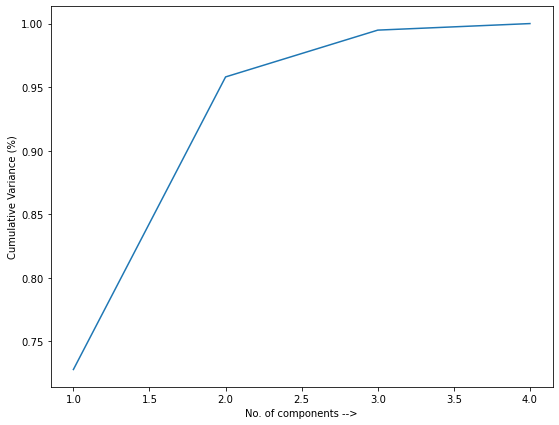

In [17]:
var_cumulative = np.cumsum(var_ratio)

plt.figure(figsize=(9, 7))
plt.plot(range(1, len(var_cumulative) + 1), var_cumulative)
plt.xlabel("No. of components -->")
plt.ylabel("Cumulative Variance (%)")
plt.show()

Let's choose 2 components to transform the data

In [18]:
pca = PCA(n_components=2, random_state=42)

In [19]:
df_new = pca.fit_transform(x)

df_new = pd.DataFrame(df_new, columns=["PC1", "PC2"])

df_new.head()

,PC1,PC2
0,-2.264542,0.505704
1,-2.086426,-0.655405
2,-2.367950,-0.318477
3,-2.304197,-0.575368
4,-2.388777,0.674767


In [20]:
df_new["iris"] = y
df_new.head()

,PC1,PC2,iris
0,-2.264542,0.505704,Iris-setosa
1,-2.086426,-0.655405,Iris-setosa
2,-2.367950,-0.318477,Iris-setosa
3,-2.304197,-0.575368,Iris-setosa
4,-2.388777,0.674767,Iris-setosa


### Visualizing the PCs

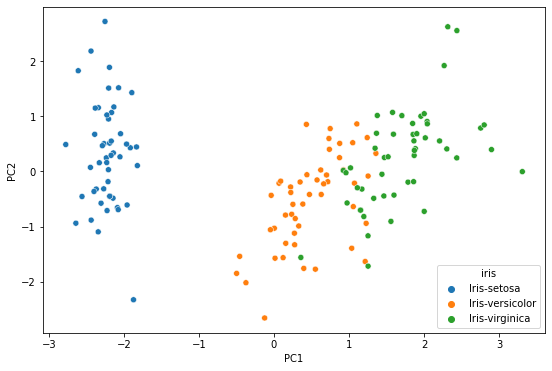

In [21]:
plt.figure(figsize=(9, 6))
sns.scatterplot(x="PC1", y="PC2", data=df_new, hue="iris")
plt.show()

Dimensionality reduction helped us visualize the relationship between the different classes of target variable

If there are more than 2 principal components, visualize the data by choosing the 1st and 2nd pc as x and y variable respectively because both of them together explain majority of the variance in the data.

### Incremental PCA

In [23]:
from sklearn.decomposition import IncrementalPCA

After you have chosen the number of components to use, you can use IncrementalPCA instead of normal PCA convert the data into desired number of components. 

- The benefit of IncrementalPCA is that it incrementally creates only as many components as specified intead of creating all the components
- This make it faster and more efficient

In [24]:
inc_pca = IncrementalPCA(n_components=2)

df_inc = inc_pca.fit_transform(x)

In [27]:
df_inc = pd.DataFrame(df_inc, columns=["PC1", "PC2"])
df_inc.head()

,PC1,PC2
0,-2.264280,0.505960
1,-2.085786,-0.654725
2,-2.368034,-0.318846
3,-2.304392,-0.575928
4,-2.388891,0.674479


### Automatic selection of number of components
- we can specify how much variance we want the pca to capture
- it will select the minimum number of principal components which can capture that much variance

In [30]:
# we want to capture 95% variance

pca = PCA(0.95)

df_automatic = pca.fit_transform(x)

In [31]:
df_automatic.shape

(150, 2)

In [32]:
df_automatic = pd.DataFrame(df_automatic, columns=["PC1", "PC2"])
df_automatic.head()

,PC1,PC2
0,-2.264542,0.505704
1,-2.086426,-0.655405
2,-2.367950,-0.318477
3,-2.304197,-0.575368
4,-2.388777,0.674767


This way is quite convinient!

We should use PCA as a preprocessing step to:-
1. remove multicollinearity
2. reduce the number of variables
3. speed up the process
4. help in visualization
5. etc.